<a href="https://colab.research.google.com/github/SAIVISHAL007/WATER_QUALITY_PREDICTION/blob/main/Water_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv('afa2e701598d20110228.csv', sep=';')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [6]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

In [7]:
# Sort and extract temporal features
df = df.sort_values(by=['id', 'date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [8]:
# Median imputation for missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Define features and target variables
features = ['id', 'year', 'month', 'NH4', 'BSK5', 'Suspended']
targets = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']

X = df[features]
y = df[targets]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model (all CPU cores)
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42))
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [9]:
metrics = pd.DataFrame(columns=['R2 Score', 'Mean Squared Error'])
for i, col in enumerate(y.columns):
    r2 = r2_score(y_test[col], y_pred[:, i])
    mse = mean_squared_error(y_test[col], y_pred[:, i])
    metrics.loc[col] = [round(r2, 4), round(mse, 4)]

# Print metrics
print(metrics)

     R2 Score  Mean Squared Error
O2     0.2393             17.5233
NO3    0.7029             10.9834
NO2    0.5200              0.3314
SO4    0.8699            515.0283
PO4    0.5909              0.2818
CL     0.9175          10566.3934


/tmp/ipython-input-10-952033802.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics.index, y=metrics['R2 Score'], palette='viridis')


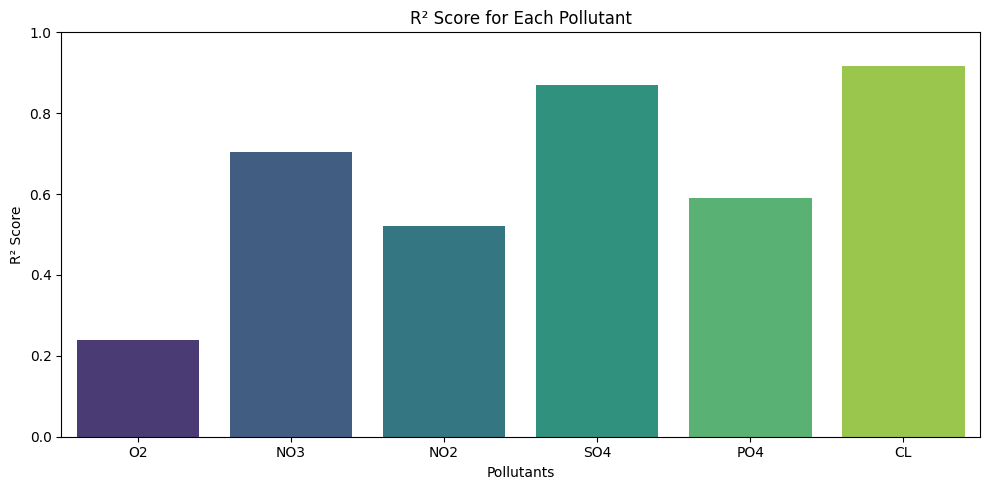

In [10]:
# Plot R² scores for better visual interpretation
plt.figure(figsize=(10, 5))
sns.barplot(x=metrics.index, y=metrics['R2 Score'], palette='viridis')
plt.ylim(0, 1)
plt.title('R² Score for Each Pollutant')
plt.ylabel('R² Score')
plt.xlabel('Pollutants')
plt.tight_layout()
plt.show()

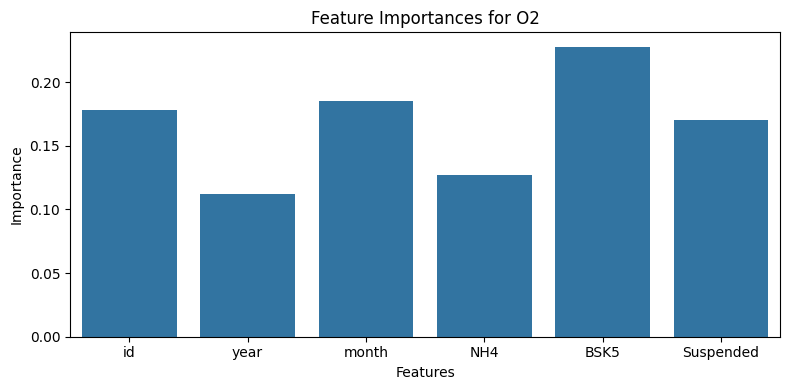

In [11]:
# Optional: Show feature importances for the first target (O2)
importances = model.estimators_[0].feature_importances_
plt.figure(figsize=(8, 4))
sns.barplot(x=features, y=importances)
plt.title('Feature Importances for O2')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [12]:
df.shape

(2861, 13)

In [13]:
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [14]:
df.isnull().sum()

,0
id,0
date,0
NH4,0
BSK5,0
Suspended,0
O2,0
NO3,0
NO2,0
SO4,0
PO4,0


In [15]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,2861.0,12.397064,1.0,8.0,14.0,16.0,22.0,6.084226
date,2861,2010-05-02 22:53:33.701502976,2000-01-10 00:00:00,2005-03-10 00:00:00,2010-06-04 00:00:00,2015-08-11 00:00:00,2021-04-07 00:00:00,NaN
NH4,2861.0,0.758169,0.0,0.08,0.22,0.5,39.427,2.485004
BSK5,2861.0,4.316001,0.0,2.16,3.8,5.8,50.9,2.973492
Suspended,2861.0,12.915509,0.0,6.0,10.0,14.8,595.0,16.498207
O2,2861.0,9.508364,0.0,7.1,8.995,11.52,90.0,4.425968
NO3,2861.0,4.316316,0.0,1.39,2.8,5.58,133.4,6.880044
NO2,2861.0,0.245931,0.0,0.03,0.059,0.125,109.0,2.18164
SO4,2861.0,58.993017,0.0,27.2,37.8,63.7,3573.4,95.792572
PO4,2861.0,0.417172,0.0,0.13,0.27,0.468,13.879,0.76768


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   datetime64[ns]
 2   NH4        2861 non-null   float64       
 3   BSK5       2861 non-null   float64       
 4   Suspended  2861 non-null   float64       
 5   O2         2861 non-null   float64       
 6   NO3        2861 non-null   float64       
 7   NO2        2861 non-null   float64       
 8   SO4        2861 non-null   float64       
 9   PO4        2861 non-null   float64       
 10  CL         2861 non-null   float64       
 11  year       2861 non-null   int32         
 12  month      2861 non-null   int32         
dtypes: datetime64[ns](1), float64(9), int32(2), int64(1)
memory usage: 268.3 KB


In [18]:
### WEEK 2 ###

In [20]:
X_encoded = pd.get_dummies(X, columns=['id'], drop_first=True)


In [23]:
import joblib
joblib.dump(model, 'pollution_model.pkl')
joblib.dump(X.columns.tolist(), 'model_columns.pkl')
print("\nModel and column structure saved!")


Model and column structure saved!


In [24]:
station_id = 22
year_input = 2024
month_input = 6
NH4_val = 0.2
BSK5_val = 3.5
Suspended_val = 15

In [25]:
input_data = pd.DataFrame({
    'year': [year_input],
    'month': [month_input],
    'NH4': [NH4_val],
    'BSK5': [BSK5_val],
    'Suspended': [Suspended_val],
    f'id_{station_id}': [1]  # One-hot encoded
})

In [26]:
for col in X.columns:
    if col not in input_data.columns:
        input_data[col] = 0

In [27]:
input_data = input_data[X.columns]
predicted_pollutants = model.predict(input_data)[0]

In [28]:
print(f"\nPredicted pollutant levels for station {station_id} in {year_input}:")
for p, val in zip(targets, predicted_pollutants):
    print(f"  {p}: {val:.2f}")


Predicted pollutant levels for station 22 in 2024:
  O2: 10.00
  NO3: 2.42
  NO2: 0.15
  SO4: 331.62
  PO4: 0.35
  CL: 1296.76


In [29]:
import os
print(os.listdir())  # This lists all files in the current directory


['.config', 'model_columns.pkl', 'afa2e701598d20110228.csv', 'pollution_model.pkl', '.ipynb_checkpoints', 'sample_data']


In [30]:
import joblib
import pandas as pd

# Load the model and column structure
model = joblib.load('pollution_model.pkl')
model_columns = joblib.load('model_columns.pkl')

# Prepare new input as DataFrame
input_data = pd.DataFrame({'year': [2025], 'id': [15]})  # Example

# One-hot encode and align with model columns
input_encoded = pd.get_dummies(input_data, columns=['id'])
for col in model_columns:
    if col not in input_encoded.columns:
        input_encoded[col] = 0
input_encoded = input_encoded[model_columns]

# Predict
predicted = model.predict(input_encoded)[0]
print(predicted)


[1.4865000e+01 5.3414500e+00 3.7089325e+01 1.3918170e+03 4.4110500e-01
 8.6247090e+02]


In [31]:
for pollutant, value in zip(targets, predicted):
    print(f"{pollutant}: {value:.2f}")


O2: 14.86
NO3: 5.34
NO2: 37.09
SO4: 1391.82
PO4: 0.44
CL: 862.47
